In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 15
# plt.rcParams["figure.titlesize"] = 20
plt.rcParams["figure.figsize"] = (3, 3)


In [131]:
def argmin_alpha(df):
    return (
        df
        .loc[(
            df
            .groupby('kdeg_Ternary')
            .relative_target
            .idxmin()
        )]
        .reset_index()
        [['Kd_T_binary', 'kdeg_Ternary', 'alpha']]
    )
    

### Plot A
% Target vs alpha, at four different  k_{deg,Ternary} values: 0, 1/32 k_{deg, T}, 1/16 k_{deg,T}, and 1 k_{deg,T}, for K_{D, binary, T} = 0.05uM.

In [191]:
results = pd.read_csv("./saved_objects/ACBI1_t=6_kd=0.05_kdeg_ternary_vs_alpha.csv")

results_a = (
    results
    .loc[results.kdeg_Ternary.isin([0, 60/32, 60/64, 60])]
    [['relative_target', 'alpha', 'kdeg_Ternary']]
    .astype({'kdeg_Ternary': str})
)

results_a.shape

(600, 3)

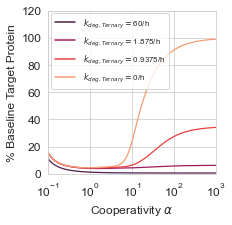

In [193]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
p = sns.lineplot(
    data=results_a,
    x='alpha',
    y='relative_target',
    hue='kdeg_Ternary',
    palette='rocket',
    linewidth=1.25,
    ax=ax
)
p.tick_params(labelsize=12)
plt.xscale('log')
plt.ylim(0, 120)
plt.xlim(0.1, 1000)
plt.ylabel('% Baseline Target Protein')
plt.xlabel(r'Cooperativity $\alpha$')

# plt.xticks([0] + [2 ** i for i in range(-4, 7, 2)])
# plt.yticks([10 ** i for i in range(-1, 4)])

handles, labels = ax.get_legend_handles_labels()
for i in range(4):
    label_value = float(labels[i])
    if label_value.is_integer():
        label_value = int(label_value)
    labels[i] = r'$k_{deg,Ternary} = $' + f'{label_value}/h'  
    
ax.legend(handles=handles, labels=labels, loc='upper left', borderaxespad=0.25)
plt.setp(ax.get_legend().get_texts(), fontsize='8')  # for legend text

plt.savefig("./plots/deg_vs_alpha_across_kdeg_ternary_kd=0.05.png", bbox_inches='tight', dpi=1200)


### Plot B
Optimal alpha vs k_{deg,Ternary} at three different K_{D,binary,T} = 0.1, 0.05, 0.01 uM.

In [196]:
results = pd.concat(
    [
        argmin_alpha(pd.read_csv("./saved_objects/ACBI1_t=6_kd=0.1_kdeg_ternary_vs_alpha.csv"))
        ,argmin_alpha(pd.read_csv("./saved_objects/ACBI1_t=6_kd=0.05_kdeg_ternary_vs_alpha.csv"))
        ,argmin_alpha(pd.read_csv("./saved_objects/ACBI1_t=6_kd=0.01_kdeg_ternary_vs_alpha.csv"))
    ]
)

results_b = (
    results
    .assign(ratio_kdeg=results.kdeg_Ternary / 60)
    .loc[results.alpha < 1000]
    .astype({'Kd_T_binary': str})
)
results_b.shape

(22, 4)

In [197]:
results_b.columns

Index(['Kd_T_binary', 'kdeg_Ternary', 'alpha', 'ratio_kdeg'], dtype='object')

In [198]:
(
    results_b
    [['Kd_T_binary', 'kdeg_Ternary', 'alpha']]
    .head()
)

,Kd_T_binary,kdeg_Ternary,alpha
0,0.1,0.000000,1.717510
1,0.1,0.058594,1.717510
2,0.1,0.117188,1.717510
3,0.1,0.234375,1.827027
4,0.1,0.468750,1.943527


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


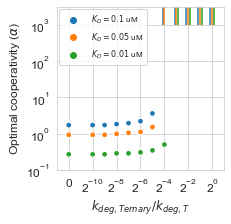

In [214]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
p = sns.scatterplot(
    data=results_b,
    x='ratio_kdeg',
    y='alpha',
    hue='Kd_T_binary',
    palette='tab10',
    linewidth=1.25,
    ax=ax
)
p.tick_params(labelsize=12)
plt.xscale('symlog', base=2, linthresh=2**-10)
plt.yscale('log')
plt.xlim(-2**-11, 2)
plt.ylim(0.1, 10**3.5)
plt.ylabel(r'Optimal cooperativity ($\alpha$)')
plt.xlabel(r'$k_{deg,Ternary} / k_{deg,T}$')

plt.xticks([0] + [(2 ** -i) for i in range(0, 11, 2)])
plt.yticks([10 ** i for i in range(-1, 4)])

handles, labels = ax.get_legend_handles_labels()
for i in range(3):
    kd = float(labels[i])
    if kd.is_integer():
        kd = int(kd)
    labels[i] = fr"$K_D = {kd}$ uM"

ax.legend(handles=handles, labels=labels,
          loc='upper left', borderaxespad=0.25)

ax.stem([(2 ** i )*0.9 for i in range(-4, 1)], [10**3 for _ in range(-4, 1)], linefmt='tab:blue', bottom=10**4, markerfmt=' ')
ax.stem([(2 ** i ) for i in range(-4, 1)], [10**3 for _ in range(-4, 1)], linefmt='tab:orange', bottom=10**4, markerfmt=' ')
ax.stem([(2 ** i )*1.1 for i in range(-3, 1)], [10**3 for _ in range(-3, 1)], linefmt='tab:green', bottom=10**4, markerfmt=' ')

plt.setp(ax.get_legend().get_texts(), fontsize='8')  # for legend text

plt.savefig("./plots/optimal_alpha_vs_kdeg_ternary_v2.eps", bbox_inches='tight', dpi=1200)
